<a href="https://colab.research.google.com/github/azeezkenny007/Project-Work/blob/main/Segmentation_of_customer_data_for_market_analysis_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies
1.   numpy - for numerical analysis
2.   pandas -for Data manipulation and analysis
3.   sklearn - To provide the machine learning algorithm
4.   Seaborn - Use for data visualization
5.   Matplotlib - for data visualization and plot








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

Data collection, analysis and cleansing







> *  Loading the data from a csv file to a pandas dataframe as a pandas dataframe







In [ ]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")




> To check if the dataset has been inputed, i did this by checking the first 5 rows
     

*   Using the head method on the customer_data variable, you can retrieve the first five rows of the file.
      
*   Using the tail method on the customer_data variable, you can retrieve the last five rows of the file.







In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


To know the structure of the data in terms of the rows and column

* To find the number of rows and columns , we use the shape property on the customer_data variable












In [ ]:
customer_data.shape

(200, 5)

The next step is to know the data type of our data    


> By using the info method we can conclude on the datatype of our data


> From the above data below we can see we have:


        1. 200 non-null value , indicating no null value in the dataset

        2. The datatype for all the columns are:
               *   Customer Id - Int64 - it can take only positive whole number.(the size is a 64bit integer value)
               *   Gender - it can contain text data or a combination of different data types (such as strings, lists, or dictionaries), but in this dataset it contains strings.
               *   Age - it can take only positive whole number(the size is a 64bit integer value)
               *   Annual income -it can take only positive whole number(the size is a 64bit integer value)
               *   Spending Score - it can take only positive whole number(the size is a 64bit integer value)

               










   



In [ ]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


To check if is there any missing to have data in a  consistent format or scale, making it easier to compare and analyze.

By using the chaining the methods of isnull().sum(), we can check if there is a null value in the data

> As you can see from the below result, there is no missing value in any of the data


In [ ]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Clusterring based on Annual income and Spending score

In [8]:
X=customer_data.iloc[:,[3,4]].values

Choose the number of clusters, This is cluster them into different group



> Using Wcss -> Within clusters sum of squares we want to display the elbow graph (also known as the Elbow Point Graph or Elbow Method).The elbow graph is used to determine the optimal number of clusters in a clustering algorithm, such as K-Means.
   

*  sns.set(): Sets Seaborn default style for plots.

*   plt.plot(range(1,11), wcss): Plots the Elbow Point Graph for K-Means.

*  plt.title('The Elbow Point Graph'): Sets the plot title.

*   plt.xlabel('Number of Clusters'): Sets the x-axis label.

*   plt.ylabel('WCSS'): Sets the y-axis label.

*   plt.show(): Displays the plot.









In [15]:
wcs =[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
   kmeans.fit(X)

   wcs.append(kmeans.inertia_)

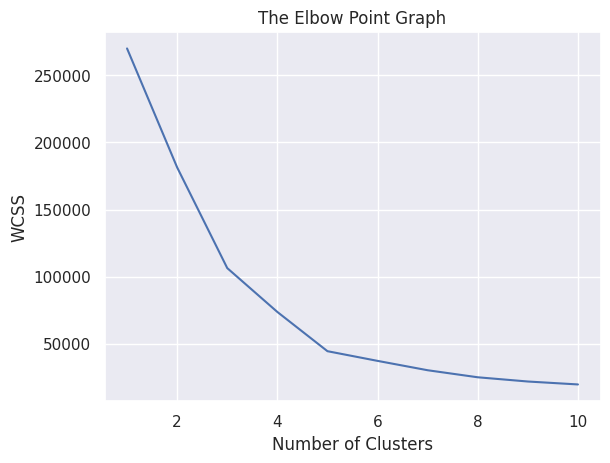

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcs)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters for the Annual income and spending score column is =5

Training the K-means Clustering model

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters



* plt.figure(figsize=(8, 8)): This line creates a new figure for the plot with a specified size of 8x8 inches. It sets the dimensions of the figure to control the visual aspect of the plot.

* plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1'): This line creates a scatter plot using the data points in X (assumed to be a 2-dimensional array or DataFrame). The data points corresponding to Y==0 are plotted on the x-axis and y-axis, respectively.

* X[Y==0, 0]: This selects the first feature (column) of the data points where the corresponding value of Y is equal to 0. It represents the x-coordinates of the data points belonging to "Cluster 1."

* X[Y==0, 1]: This selects the second feature (column) of the data points where the corresponding value of Y is equal to 0. It represents the y-coordinates of the data points belonging to "Cluster 1."

* s=50: This sets the size of the markers (data points) in the scatter plot to 50.

* c='green': This sets the color of the markers to green.

* label='Cluster 1': This sets the label for the data points represented by green markers, identifying them as "Cluster 1."



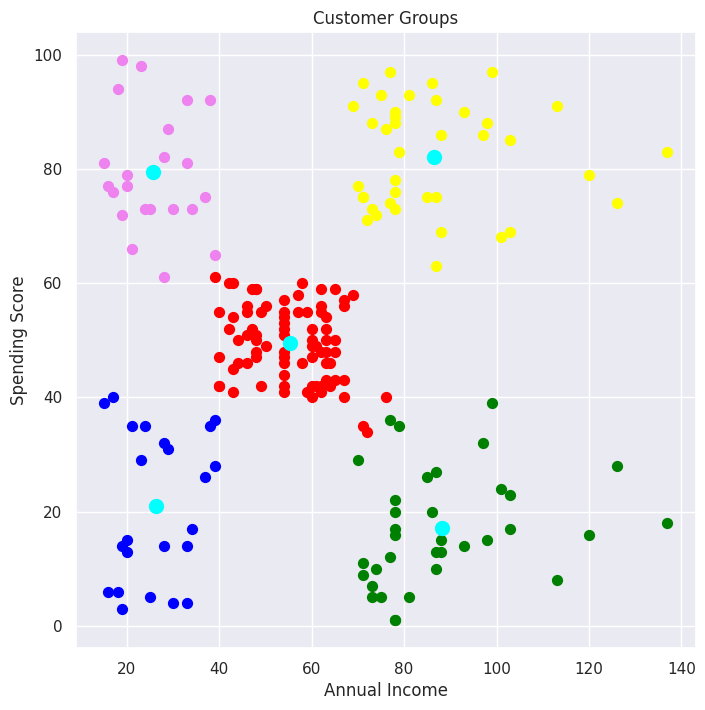

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

Picking the age and annual income column clustering

In [26]:
L = customer_data.iloc[:, [2, 3]].values



Choose the number of clusters, This is cluster them into different group



> Using Wcss -> Within clusters sum of squares we want to display the elbow graph (also known as the Elbow Point Graph or Elbow Method).The elbow graph is used to determine the optimal number of clusters in a clustering algorithm, such as K-Means.
   

*  sns.set(): Sets Seaborn default style for plots.

*   plt.plot(range(1,11), wcss): Plots the Elbow Point Graph for K-Means.

*  plt.title('The Elbow Point Graph'): Sets the plot title.

*   plt.xlabel('Number of Clusters'): Sets the x-axis label.

*   plt.ylabel('WCSS'): Sets the y-axis label.

*   plt.show(): Displays the plot.




In [27]:
cluster_for_age_and_annual_income =[]
for i in range(1,11):
   kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
   kmeans.fit(L)

   cluster_for_age_and_annual_income.append(kmeans.inertia_)

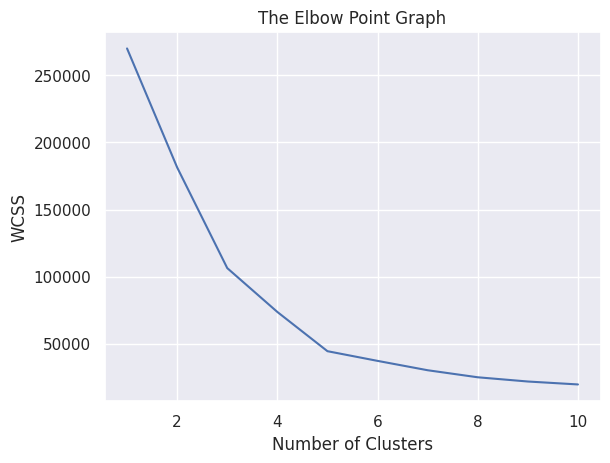

In [22]:
sns.set()
plt.plot(range(1,11), cluster_for_age_and_annual_income)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters for the Annual income and spending score column is =5

Training the K-means Clustering model

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# return a label for each data point based on their cluster
Z= kmeans.fit_predict(L)

print(Z)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1
 1 1 4 3 4 3 4 3 4 3 4 4 4 3 4 4 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 4 4 3 3 3 3
 3 4 3 4 4 3 3 4 3 3 4 3 3 4 4 3 3 4 3 4 4 4 3 4 3 4 4 3 3 4 3 4 3 3 3 3 3
 4 0 4 4 4 3 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Choose the number of clusters, This is cluster them into different group



> Using Wcss -> Within clusters sum of squares we want to display the elbow graph (also known as the Elbow Point Graph or Elbow Method).The elbow graph is used to determine the optimal number of clusters in a clustering algorithm, such as K-Means.
   

*  sns.set(): Sets Seaborn default style for plots.

*   plt.plot(range(1,11), wcss): Plots the Elbow Point Graph for K-Means.

*  plt.title('The Elbow Point Graph'): Sets the plot title.

*   plt.xlabel('Number of Clusters'): Sets the x-axis label.

*   plt.ylabel('WCSS'): Sets the y-axis label.

*   plt.show(): Displays the plot.




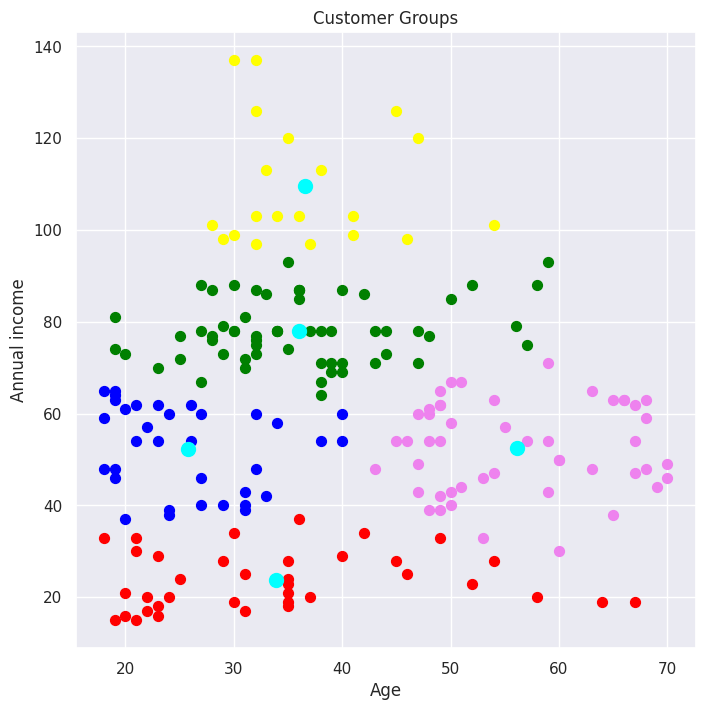

In [32]:
    plt.figure(figsize=(8,8))
    plt.scatter(L[Z==0,0], L[Z==0,1], s=50, c='green', label='Cluster 1')
    plt.scatter(L[Z==1,0], L[Z==1,1], s=50, c='red', label='Cluster 2')
    plt.scatter(L[Z==2,0], L[Z==2,1], s=50, c='yellow', label='Cluster 3')
    plt.scatter(L[Z==3,0], L[Z==3,1], s=50, c='violet', label='Cluster 4')
    plt.scatter(L[Z==4,0], L[Z==4,1], s=50, c='blue', label='Cluster 5')

    # plot the centroids
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

    plt.title('Customer Groups')
    plt.xlabel('Age')
    plt.ylabel('Annual income')
    plt.show()

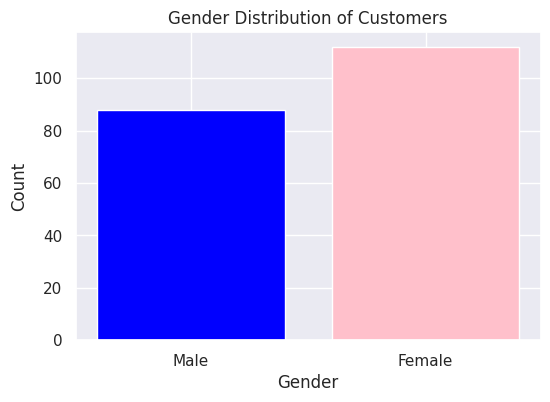

In [33]:
gender_counts = customer_data['Gender'].value_counts()

# Separate counts for males and females
male_count = gender_counts['Male']
female_count = gender_counts['Female']

# Create a bar plot to visualize the gender counts
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [male_count, female_count], color=['blue', 'pink'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()